In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from adjustText import adjust_text
from matplotlib import ticker

In [13]:
df = pd.read_csv("overlap.csv")#[:14]
df

,lang,type,overlap__ind,overlap__eng,overlap__ind__pct,overlap__eng__pct,token_size,token_size__normalized,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,nia,Wikipedia,0.2745,0.2848,27.45,28.48,246643,500000,NaN,NaN,NaN
1,bew,NusaWriting,0.4385,0.2163,43.85,21.63,1164932,5000000,NaN,NaN,NaN
2,rej,NusaWriting,0.3542,0.2390,35.42,23.90,156900,500000,NaN,500000.0,18.0
3,mad,NusaWriting,0.3074,0.2556,30.74,25.56,573833,1000000,NaN,1000000.0,7.0
4,min,NusaWriting,0.4166,0.2570,41.66,25.70,960961,1000000,NaN,5000000.0,4.0
5,bug,NusaWriting,0.3116,0.2571,31.16,25.71,118392,500000,NaN,10000000.0,3.0
6,jav,NusaWriting,0.4180,0.2628,41.80,26.28,1116678,5000000,NaN,NaN,NaN
7,sun,NusaWriting,0.4045,0.2654,40.45,26.54,1111848,5000000,NaN,NaN,NaN
8,mak,NusaTranslation,0.2316,0.2665,23.16,26.65,191528,500000,NaN,NaN,NaN
9,bew,NusaTranslation,0.4260,0.2665,42.60,26.65,209867,500000,NaN,NaN,NaN


In [14]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

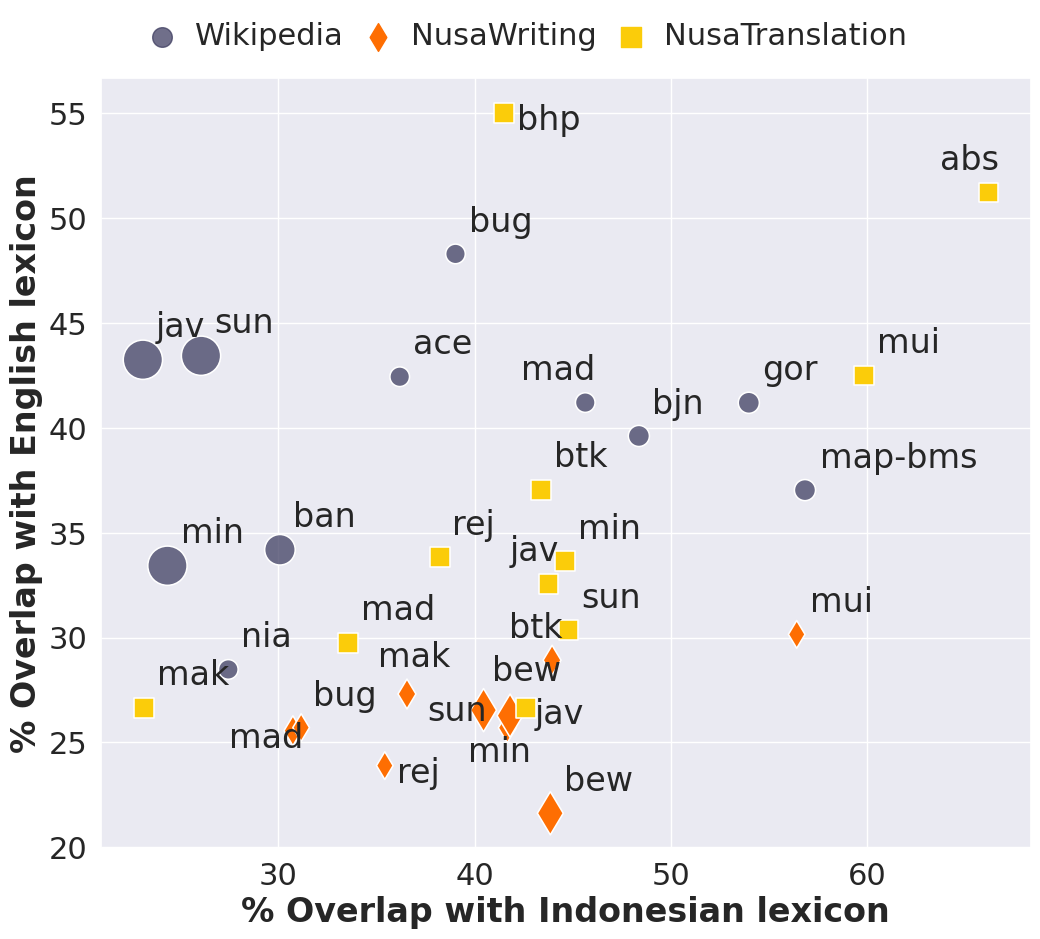

In [180]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("darkgrid")
# sns.set(rc={'axes.facecolor':'#dddddd'})
plt.figure(figsize=(12,10))

sns.set(font_scale=2)

x = "overlap__ind__pct"
y = "overlap__eng__pct"

plot = sns.scatterplot(
    data=df, x=x, y=y, hue="type", style="type", size="token_size__normalized",
    legend="auto", sizes=(200, 800), markers={"Wikipedia": "o", "NusaWriting": "d", "NusaTranslation": "s"},
    palette=["#3c3b5fbb", "#fe6e02ff", "#fbcc0aff"],
    # palette=["#1f2a4daa", "#fe6e02aa", "#fbcc0aaa"],
)

# plot = sns.scatterplot(
#     data=df, x=x, y=y, hue="type", style="type", legend="auto", palette="magma",
# )

# Add text besides each point
texts = [plt.text(df[x][line]+0.6, df[y][line]+0.6, df["lang"][line]) for line in range(df.shape[0])]
adjust_text(texts) # arrowprops=dict(arrowstyle='->', color='red'))

# plot.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# plot.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plot.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plot.yaxis.set_minor_locator(ticker.AutoMinorLocator())

handles, labels = plot.get_legend_handles_labels()
used_handles, used_labels = [], []
for i, (h, l) in enumerate(zip(handles, labels)):
    if l not in ["type", "token_size__normalized"]:
        used_handles.append(h)
        if i <= 4:
            used_labels.append(l)
        # else:
        #     used_labels.append(human_format(int(l)))
used_labels += ["<= 500K", "<= 1M", "<= 5M", "> 5M"]
legend = plot.legend(handles=used_handles[:3], labels=used_labels[:3])
legend.legend_handles[0]._sizes = [200]
legend.legend_handles[1]._sizes = [200]
legend.legend_handles[2]._sizes = [200]
# plot.legend(loc='center left', bbox_to_anchor=(0, 1.05), ncol=10)
# for legend text
sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.45, 1), ncol=3, title=None, frameon=False, handletextpad=0.1, columnspacing=0.1
)

plt.xlabel("% Overlap with Indonesian lexicon", weight="bold")
plt.ylabel("% Overlap with English lexicon", weight="bold")

plt.savefig("overlapping_lexicon.png", dpi="figure", bbox_inches="tight")
plt.show(plot)